In [1]:
from extract_data import *
import pandas as pd
import numpy as np

In [63]:
upperTimeThreshold = 900
lowerTimeThreshold = 700

In [2]:
data = get_all_data('/home/kevin/Documents/10-701-Project/data/Blazar_LC.csv', '/home/kevin/Documents/10-701-Project/data/CV_LC.csv')

We have 234 Blazar points
We have 704 CV points


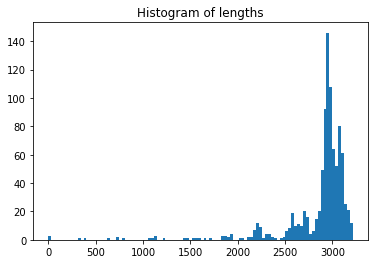

In [41]:
lengths = []
num_points = []
for i in data:
    max_time = data[i]['MJD'].max()
    min_time = data[i]['MJD'].min()
    lengths.append(max_time - min_time)
    num_points.append(len(data[i]['MJD']))

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(lengths, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of lengths")
plt.show()
del lengths

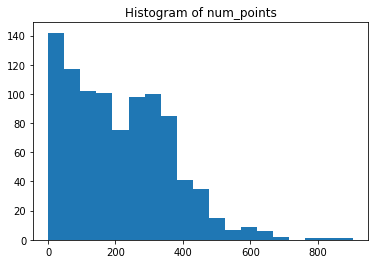

In [42]:
plt.hist(num_points, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of num_points")
plt.show()

pointsThreshold = np.percentile(num_points, 10) # 28

In [69]:
def cut_up_one_light_curve(times, mags):
    if (len(times) < 3) or (times.max() - times.min()) < lowerTimeThreshold:
        return []
    threshold = times.min() + upperTimeThreshold
    idx = times <= threshold
    good_times = times[idx]
    good_mags = mags[idx]
    next_idx = times > threshold
    if (good_times.max() - good_times.min()) < lowerTimeThreshold:
        return cut_up_one_light_curve(times[next_idx], mags[next_idx])
    return [(good_times, good_mags)] + cut_up_one_light_curve(times[next_idx], mags[next_idx])

SFs = dict()
counter = 0
lengths = []
num_points = []
for i in data:
    label = data[i]['class']
    for (t, m) in cut_up_one_light_curve(data[i]['MJD'], data[i]['Mag']):
        SFs[counter] = dict()
        (td, md) = BuildSF(t,m)
        SFs[counter]['timediff'] = td
        SFs[counter]['magdiff'] = md
        SFs[counter]['class'] = label
        if (len(td) <= pointsThreshold * pointsThreshold * 0.5):
            continue
        lengths.append(td.max() - td.min())
        num_points.append(len(td))
        counter += 1
    

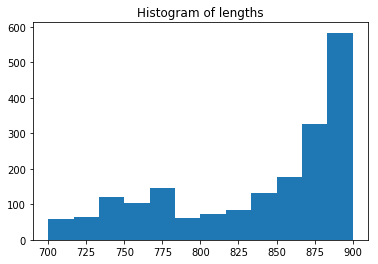

In [70]:
plt.hist(lengths, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of lengths")
plt.show()
# np.percentile(lengths, 5)

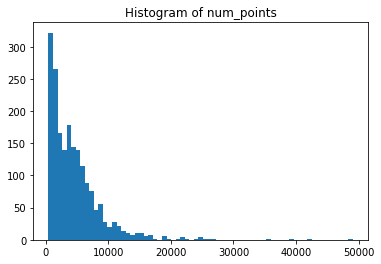

3640.0

In [72]:
plt.hist(num_points, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of num_points")
plt.show()
np.percentile(num_points, 50)

In [76]:
with open('SF.pickle','wb') as F:
    pickle.dump(SFs, F)